In [1]:
import pandas as pd
import numpy as np
import pickle as pkl
import matplotlib.pyplot as plt

In [2]:
pc = pd.read_csv('exp_artemia_change.csv')
pc

,experiment,artemia_change
0,X043a D1Fx30 SR,42.833333
1,X043b D1Fx30 SR,21.857143
2,X083a D1Fe9 SR - XL2,21.800000
3,X122b D30Fe1 SR - W2,20.020000
4,X122e D30Fe1 SR - W1,17.140741
...,...,...
328,X016C2 D2Fx75 SR,0.000000
329,X149a D30Fe1 RPA - XL,0.000000
330,X147a D30Fe11 SR - IBC,-2.967742
331,X037a D2Fx50 SR,-3.978261


# Remove outliers

In [3]:
q1, q3 = pc.artemia_change.quantile((0.25, 0.75))

In [4]:
q1

0.8333333333333334

In [5]:
q3

3.430232558139535

In [6]:
iqr = q3-q1
filtered = pc[(pc.artemia_change>=q1-1.5*iqr)&(pc.artemia_change<=q3+1.5*iqr)]
filtered

,experiment,artemia_change
23,X123a D30Fe18 SR - IBC,7.130435
24,X015b D2F80 SR,7.102564
25,"X191a D3 to D1 Fe41 SP,BY - XL",6.850000
26,X077a D30Fe8 SR - IBC,6.824074
27,X097a D30Fe11 SR - XL2,6.800000
...,...,...
326,X017c D2F80 SR - x,0.000000
327,X023a D2Fx50 SR - XL,0.000000
328,X016C2 D2Fx75 SR,0.000000
329,X149a D30Fe1 RPA - XL,0.000000


In [7]:
top = filtered.head(10)
top

,experiment,artemia_change
23,X123a D30Fe18 SR - IBC,7.130435
24,X015b D2F80 SR,7.102564
25,"X191a D3 to D1 Fe41 SP,BY - XL",6.850000
26,X077a D30Fe8 SR - IBC,6.824074
27,X097a D30Fe11 SR - XL2,6.800000
28,X092a D1Fe10 SR - XL2,6.647059
29,X069a D3Fe1 SR - XL,6.571429
30,X088a D1Fe10 SR - XL2,6.400000
31,X086a D30Fe8 SR - IBC,6.320000
32,X114a D30Fe11 SR - XL2,6.277778


## D30 best

## Feed: 
- F11: 1
- F1: 3
- F8: 2
- F16: 1
- F10: 1
- F30: 1
- F18: 1

## Next steps: take each of the 10 here and look at the rate of change over however many days of the experiment there are. Take those rates and see which has the highest change over whatever many days(?)

In [8]:
data = pkl.load(open('aquanzo_feedtype_new.pkl', 'rb'))
data

{'mixed':                      Experiment name Day of Experiment  Temperature [C]  \
 1652        X104a D30Fe11 SP,MP - XL                 1              NaN   
 1653        X105a D30Fe11 SP,MR - XL                 1              NaN   
 1655        X105a D30Fe11 SP,MR - XL                 2             24.9   
 1656        X104a D30Fe11 SP,MP - XL                 2             24.5   
 1658        X104a D30Fe11 SP,MP - XL                 3             25.7   
 ...                              ...               ...              ...   
 3039  X192b D3 to D1 Fe41 SP,BY - XL                11             27.0   
 3040  X192c D3 to D1 Fe41 SP,BY - XL                 7             27.8   
 3041  X190a D2Fe40 BY, BM - 2IBCs+XL                22             27.3   
 3042  X192b D3 to D1 Fe41 SP,BY - XL                12             26.9   
 3043  X190a D2Fe40 BY, BM - 2IBCs+XL                23             26.7   
 
       pH [-]  Salinity [ppt]  Concentration of feed solution (g/L)  \
 1652 

In [9]:
df_top = pd.DataFrame()
for nom in top.experiment.values:
    for key in data.keys():
        frame = data[key]
        try:
            if nom in frame['Experiment name'].values:
                to_add = frame[frame['Experiment name']==nom]
                df_top = pd.concat([df_top, to_add], ignore_index=True)
                break
        except:
            continue

In [10]:
df_top

,Experiment name,Day of Experiment,Temperature [C],pH [-],Salinity [ppt],Concentration of feed solution (g/L),Volume of feed solution given (L),Feed not fed DM (g/day),Feed fed DM (g/day),Actual feed ration given (% BW),Weight wet sieve [g],Water drained [l],Measured weight S+A [g],Artemia weight [g/l],Individual weight wet [mg/animal]
0,X123a D30Fe18 SR - IBC,2,25.5,6.89,34.0,45.0,4.30,31.5,193.5,33.0,18.57,5.0,22.02,0.69,0.00
1,X123a D30Fe18 SR - IBC,3,30.1,7.43,32.0,53.0,4.35,34.1,228.4,25.0,18.57,5.0,24.02,1.09,0.00
2,X123a D30Fe18 SR - IBC,4,30.7,7.30,33.0,64.0,5.00,0.0,320.0,22.0,18.41,5.0,27.42,1.80,0.00
3,X123a D30Fe18 SR - IBC,5,29.1,7.62,31.0,72.0,4.50,36.0,324.0,16.0,20.07,5.0,32.42,2.47,0.00
4,X123a D30Fe18 SR - IBC,6,29.9,7.08,33.0,60.0,4.70,18.0,282.0,15.0,20.73,5.0,32.56,2.37,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,X114a D30Fe11 SR - XL2,14,29.7,7.07,33.0,81.0,9.00,81.2,730.8,14.0,19.22,2.0,32.75,6.77,0.00
118,X114a D30Fe11 SR - XL2,15,24.1,7.33,35.0,75.0,9.15,63.4,682.6,14.0,19.22,5.0,50.31,6.22,1.43
119,X114a D30Fe11 SR - XL2,16,21.7,7.30,36.0,52.0,9.00,51.8,466.2,14.0,19.22,2.0,27.85,4.32,0.00
120,X114a D30Fe11 SR - XL2,17,26.0,7.91,33.0,36.0,7.00,107.3,250.4,8.0,19.22,2.0,27.80,4.29,0.00


In [11]:
df_top['Experiment name'].nunique()

10

In [12]:
df_top.to_csv('top_ten_exps.csv', index=False)

# Looking at best experiment for each day

In [13]:
df = pd.read_csv('top_ten_exps.csv')
df

,Experiment name,Day of Experiment,Temperature [C],pH [-],Salinity [ppt],Concentration of feed solution (g/L),Volume of feed solution given (L),Feed not fed DM (g/day),Feed fed DM (g/day),Actual feed ration given (% BW),Weight wet sieve [g],Water drained [l],Measured weight S+A [g],Artemia weight [g/l],Individual weight wet [mg/animal]
0,X123a D30Fe18 SR - IBC,2,25.5,6.89,34.0,45.0,4.30,31.5,193.5,33.0,18.57,5.0,22.02,0.69,0.00
1,X123a D30Fe18 SR - IBC,3,30.1,7.43,32.0,53.0,4.35,34.1,228.4,25.0,18.57,5.0,24.02,1.09,0.00
2,X123a D30Fe18 SR - IBC,4,30.7,7.30,33.0,64.0,5.00,0.0,320.0,22.0,18.41,5.0,27.42,1.80,0.00
3,X123a D30Fe18 SR - IBC,5,29.1,7.62,31.0,72.0,4.50,36.0,324.0,16.0,20.07,5.0,32.42,2.47,0.00
4,X123a D30Fe18 SR - IBC,6,29.9,7.08,33.0,60.0,4.70,18.0,282.0,15.0,20.73,5.0,32.56,2.37,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,X114a D30Fe11 SR - XL2,14,29.7,7.07,33.0,81.0,9.00,81.2,730.8,14.0,19.22,2.0,32.75,6.77,0.00
118,X114a D30Fe11 SR - XL2,15,24.1,7.33,35.0,75.0,9.15,63.4,682.6,14.0,19.22,5.0,50.31,6.22,1.43
119,X114a D30Fe11 SR - XL2,16,21.7,7.30,36.0,52.0,9.00,51.8,466.2,14.0,19.22,2.0,27.85,4.32,0.00
120,X114a D30Fe11 SR - XL2,17,26.0,7.91,33.0,36.0,7.00,107.3,250.4,8.0,19.22,2.0,27.80,4.29,0.00


In [14]:
df['Day of Experiment'].unique()

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21,  1], dtype=int64)

In [15]:
df_diffs = pd.DataFrame()
for nom in df['Experiment name'].unique():
    tmp = df.iloc[:, 2:].diff(periods=1)
    tmp.insert(0, df.columns[0], df.iloc[:, 0])
    tmp.insert(1, df.columns[1], df.iloc[:, 1])
    df_diffs = pd.concat([df_diffs, tmp], ignore_index=True)

In [16]:
df_diffs

,Experiment name,Day of Experiment,Temperature [C],pH [-],Salinity [ppt],Concentration of feed solution (g/L),Volume of feed solution given (L),Feed not fed DM (g/day),Feed fed DM (g/day),Actual feed ration given (% BW),Weight wet sieve [g],Water drained [l],Measured weight S+A [g],Artemia weight [g/l],Individual weight wet [mg/animal]
0,X123a D30Fe18 SR - IBC,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,X123a D30Fe18 SR - IBC,3,4.6,0.54,-2.0,8.0,0.05,2.6,34.9,-8.0,0.00,0.0,2.00,0.40,0.00
2,X123a D30Fe18 SR - IBC,4,0.6,-0.13,1.0,11.0,0.65,-34.1,91.6,-3.0,-0.16,0.0,3.40,0.71,0.00
3,X123a D30Fe18 SR - IBC,5,-1.6,0.32,-2.0,8.0,-0.50,36.0,4.0,-6.0,1.66,0.0,5.00,0.67,0.00
4,X123a D30Fe18 SR - IBC,6,0.8,-0.54,2.0,-12.0,0.20,-18.0,-42.0,-1.0,0.66,0.0,0.14,-0.10,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1215,X114a D30Fe11 SR - XL2,14,1.4,0.00,0.0,14.0,-0.05,17.3,121.7,0.0,0.00,0.0,2.32,1.16,0.00
1216,X114a D30Fe11 SR - XL2,15,-5.6,0.26,2.0,-6.0,0.15,-17.8,-48.2,0.0,0.00,3.0,17.56,-0.55,1.43
1217,X114a D30Fe11 SR - XL2,16,-2.4,-0.03,1.0,-23.0,-0.15,-11.6,-216.4,0.0,0.00,-3.0,-22.46,-1.90,-1.43
1218,X114a D30Fe11 SR - XL2,17,4.3,0.61,-3.0,-16.0,-2.00,55.5,-215.8,-6.0,0.00,0.0,-0.05,-0.03,0.00


In [17]:
best_days = {}
for num in df_diffs['Day of Experiment'].unique():
    tmp = df_diffs[df_diffs['Day of Experiment']==num].sort_values(by='Artemia weight [g/l]', ascending=False)
    best_days[num] = {tmp.iloc[0, 0]:tmp.iloc[0, 13]}

In [18]:
best_days

{2: {'X077a D30Fe8 SR - IBC': 0.52},
 3: {'X097a D30Fe11 SR - XL2': 1.19},
 4: {'X077a D30Fe8 SR - IBC': 0.9099999999999997},
 5: {'X086a D30Fe8 SR - IBC': 0.8600000000000001},
 6: {'X077a D30Fe8 SR - IBC': 0.94},
 7: {'X077a D30Fe8 SR - IBC': 1.0100000000000002},
 8: {'X097a D30Fe11 SR - XL2': 0.7699999999999996},
 9: {'X077a D30Fe8 SR - IBC': 0.9299999999999997},
 10: {'X086a D30Fe8 SR - IBC': 1.5500000000000003},
 11: {'X015b D2F80 SR': 0.78},
 12: {'X015b D2F80 SR': 0.2999999999999998},
 13: {'X114a D30Fe11 SR - XL2': 1.2600000000000007},
 14: {'X114a D30Fe11 SR - XL2': 1.1599999999999993},
 15: {'X191a D3 to D1 Fe41 SP,BY - XL': 0.3900000000000001},
 16: {'X191a D3 to D1 Fe41 SP,BY - XL': -0.0900000000000003},
 17: {'X191a D3 to D1 Fe41 SP,BY - XL': 0.6799999999999997},
 18: {'X114a D30Fe11 SR - XL2': 0.22999999999999954},
 19: {'X191a D3 to D1 Fe41 SP,BY - XL': -0.8700000000000001},
 20: {'X191a D3 to D1 Fe41 SP,BY - XL': -1.1800000000000002},
 21: {'X191a D3 to D1 Fe41 SP,BY - X

In [19]:
df_diffs.to_csv('diffs_with_exp_names_top_ten.csv', index=False)
pkl.dump(best_days, open('best_days.pkl', 'wb'))

## 30% from day 1 to 4 seems best (Fe1/8), need to check how much better Fe18 is than the next counterpart

In [20]:
df_diffs[df_diffs['Day of Experiment']==5].sort_values(by='Artemia weight [g/l]', ascending = False)

,Experiment name,Day of Experiment,Temperature [C],pH [-],Salinity [ppt],Concentration of feed solution (g/L),Volume of feed solution given (L),Feed not fed DM (g/day),Feed fed DM (g/day),Actual feed ration given (% BW),Weight wet sieve [g],Water drained [l],Measured weight S+A [g],Artemia weight [g/l],Individual weight wet [mg/animal]
830,X086a D30Fe8 SR - IBC,5,0.1,-0.39,0.0,46.2,-0.40,42.9,188.1,-2.0,-0.029,0.0,4.244,0.86,0.00
586,X086a D30Fe8 SR - IBC,5,0.1,-0.39,0.0,46.2,-0.40,42.9,188.1,-2.0,-0.029,0.0,4.244,0.86,0.00
1196,X086a D30Fe8 SR - IBC,5,0.1,-0.39,0.0,46.2,-0.40,42.9,188.1,-2.0,-0.029,0.0,4.244,0.86,0.00
342,X086a D30Fe8 SR - IBC,5,0.1,-0.39,0.0,46.2,-0.40,42.9,188.1,-2.0,-0.029,0.0,4.244,0.86,0.00
1074,X086a D30Fe8 SR - IBC,5,0.1,-0.39,0.0,46.2,-0.40,42.9,188.1,-2.0,-0.029,0.0,4.244,0.86,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1123,"X191a D3 to D1 Fe41 SP,BY - XL",5,-1.6,0.12,2.0,-7.0,0.01,-0.6,-6.8,-16.0,-0.276,0.0,0.298,0.12,-0.05
513,"X191a D3 to D1 Fe41 SP,BY - XL",5,-1.6,0.12,2.0,-7.0,0.01,-0.6,-6.8,-16.0,-0.276,0.0,0.298,0.12,-0.05
269,"X191a D3 to D1 Fe41 SP,BY - XL",5,-1.6,0.12,2.0,-7.0,0.01,-0.6,-6.8,-16.0,-0.276,0.0,0.298,0.12,-0.05
757,"X191a D3 to D1 Fe41 SP,BY - XL",5,-1.6,0.12,2.0,-7.0,0.01,-0.6,-6.8,-16.0,-0.276,0.0,0.298,0.12,-0.05


In [21]:
df_diffs[df_diffs['Day of Experiment']==5].sort_values(by='Artemia weight [g/l]', ascending = False)['Experiment name'].unique()   

array(['X086a D30Fe8 SR - IBC', 'X123a D30Fe18 SR - IBC',
       'X097a D30Fe11 SR - XL2', 'X015b D2F80 SR',
       'X114a D30Fe11 SR - XL2', 'X077a D30Fe8 SR - IBC',
       'X092a D1Fe10 SR - XL2', 'X069a D3Fe1 SR - XL',
       'X088a D1Fe10 SR - XL2', 'X191a D3 to D1 Fe41 SP,BY - XL'],
      dtype=object)

In [22]:
df_diffs_5 = df_diffs[df_diffs['Day of Experiment']==5].sort_values(by='Artemia weight [g/l]', ascending = False)
df_diffs_5[df_diffs_5['Experiment name']=='X082a D30Fe8 SR - IBC']

,Experiment name,Day of Experiment,Temperature [C],pH [-],Salinity [ppt],Concentration of feed solution (g/L),Volume of feed solution given (L),Feed not fed DM (g/day),Feed fed DM (g/day),Actual feed ration given (% BW),Weight wet sieve [g],Water drained [l],Measured weight S+A [g],Artemia weight [g/l],Individual weight wet [mg/animal]


In [23]:
100-(0.62/0.67)*100

7.462686567164184

In [24]:
df_diffs_5['Artemia weight [g/l]'].std()

0.23950496083093184

In [25]:
df_diffs_5['Artemia weight [g/l]'].median()

0.29500000000000015

## I think we have a statistically significant difference here when it comes to change between top and second. Is changing the feed for one day viable?

## If not then full list would be: 1-4 30% SR, 4  0.4g/L RB, 5-8 30% SR, 9 30% PA, 10 remove from tank 

# Checking top for 20 days

In [26]:
filtered

,experiment,artemia_change
23,X123a D30Fe18 SR - IBC,7.130435
24,X015b D2F80 SR,7.102564
25,"X191a D3 to D1 Fe41 SP,BY - XL",6.850000
26,X077a D30Fe8 SR - IBC,6.824074
27,X097a D30Fe11 SR - XL2,6.800000
...,...,...
326,X017c D2F80 SR - x,0.000000
327,X023a D2Fx50 SR - XL,0.000000
328,X016C2 D2Fx75 SR,0.000000
329,X149a D30Fe1 RPA - XL,0.000000


In [27]:
data

{'mixed':                      Experiment name Day of Experiment  Temperature [C]  \
 1652        X104a D30Fe11 SP,MP - XL                 1              NaN   
 1653        X105a D30Fe11 SP,MR - XL                 1              NaN   
 1655        X105a D30Fe11 SP,MR - XL                 2             24.9   
 1656        X104a D30Fe11 SP,MP - XL                 2             24.5   
 1658        X104a D30Fe11 SP,MP - XL                 3             25.7   
 ...                              ...               ...              ...   
 3039  X192b D3 to D1 Fe41 SP,BY - XL                11             27.0   
 3040  X192c D3 to D1 Fe41 SP,BY - XL                 7             27.8   
 3041  X190a D2Fe40 BY, BM - 2IBCs+XL                22             27.3   
 3042  X192b D3 to D1 Fe41 SP,BY - XL                12             26.9   
 3043  X190a D2Fe40 BY, BM - 2IBCs+XL                23             26.7   
 
       pH [-]  Salinity [ppt]  Concentration of feed solution (g/L)  \
 1652 

In [28]:
top = filtered.head(20)
top

,experiment,artemia_change
23,X123a D30Fe18 SR - IBC,7.130435
24,X015b D2F80 SR,7.102564
25,"X191a D3 to D1 Fe41 SP,BY - XL",6.850000
26,X077a D30Fe8 SR - IBC,6.824074
27,X097a D30Fe11 SR - XL2,6.800000
28,X092a D1Fe10 SR - XL2,6.647059
29,X069a D3Fe1 SR - XL,6.571429
30,X088a D1Fe10 SR - XL2,6.400000
31,X086a D30Fe8 SR - IBC,6.320000
32,X114a D30Fe11 SR - XL2,6.277778


In [29]:
df_top = pd.DataFrame()
for nom in top.experiment.values:
    for key in data.keys():
        frame = data[key]
        try:
            if nom in frame['Experiment name'].values:
                to_add = frame[frame['Experiment name']==nom]
                df_top = pd.concat([df_top, to_add], ignore_index=True)
                break
        except:
            continue

In [30]:
df_top

,Experiment name,Day of Experiment,Temperature [C],pH [-],Salinity [ppt],Concentration of feed solution (g/L),Volume of feed solution given (L),Feed not fed DM (g/day),Feed fed DM (g/day),Actual feed ration given (% BW),Weight wet sieve [g],Water drained [l],Measured weight S+A [g],Artemia weight [g/l],Individual weight wet [mg/animal]
0,X123a D30Fe18 SR - IBC,2,25.5,6.89,34.0,45.0,4.30,31.5,193.5,33.0,18.57,5.0,22.02,0.69,0.00
1,X123a D30Fe18 SR - IBC,3,30.1,7.43,32.0,53.0,4.35,34.1,228.4,25.0,18.57,5.0,24.02,1.09,0.00
2,X123a D30Fe18 SR - IBC,4,30.7,7.30,33.0,64.0,5.00,0.0,320.0,22.0,18.41,5.0,27.42,1.80,0.00
3,X123a D30Fe18 SR - IBC,5,29.1,7.62,31.0,72.0,4.50,36.0,324.0,16.0,20.07,5.0,32.42,2.47,0.00
4,X123a D30Fe18 SR - IBC,6,29.9,7.08,33.0,60.0,4.70,18.0,282.0,15.0,20.73,5.0,32.56,2.37,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,"X141b D30Fe1 PA, BM - XL",6,23.1,7.18,32.0,19.0,4.65,6.6,87.4,19.0,18.41,5.0,28.20,1.96,0.00
230,"X141b D30Fe1 PA, BM - XL",7,22.9,7.29,33.0,12.0,5.00,0.0,59.0,10.0,18.41,5.0,30.61,2.44,0.00
231,"X141b D30Fe1 PA, BM - XL",8,21.1,7.30,34.0,14.0,5.00,0.0,71.0,10.0,18.60,5.0,33.45,2.97,0.00
232,"X141b D30Fe1 PA, BM - XL",9,22.9,7.29,35.0,21.0,5.00,0.0,103.8,10.0,18.41,5.0,40.04,4.33,0.00


In [31]:
df_top['Experiment name'].nunique()

20

In [32]:
df_top.to_csv('top_twenty_exps.csv', index=False)

# Looking at best experiment for each day

In [33]:
df = pd.read_csv('top_twenty_exps.csv')
df

,Experiment name,Day of Experiment,Temperature [C],pH [-],Salinity [ppt],Concentration of feed solution (g/L),Volume of feed solution given (L),Feed not fed DM (g/day),Feed fed DM (g/day),Actual feed ration given (% BW),Weight wet sieve [g],Water drained [l],Measured weight S+A [g],Artemia weight [g/l],Individual weight wet [mg/animal]
0,X123a D30Fe18 SR - IBC,2,25.5,6.89,34.0,45.0,4.30,31.5,193.5,33.0,18.57,5.0,22.02,0.69,0.00
1,X123a D30Fe18 SR - IBC,3,30.1,7.43,32.0,53.0,4.35,34.1,228.4,25.0,18.57,5.0,24.02,1.09,0.00
2,X123a D30Fe18 SR - IBC,4,30.7,7.30,33.0,64.0,5.00,0.0,320.0,22.0,18.41,5.0,27.42,1.80,0.00
3,X123a D30Fe18 SR - IBC,5,29.1,7.62,31.0,72.0,4.50,36.0,324.0,16.0,20.07,5.0,32.42,2.47,0.00
4,X123a D30Fe18 SR - IBC,6,29.9,7.08,33.0,60.0,4.70,18.0,282.0,15.0,20.73,5.0,32.56,2.37,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,"X141b D30Fe1 PA, BM - XL",6,23.1,7.18,32.0,19.0,4.65,6.6,87.4,19.0,18.41,5.0,28.20,1.96,0.00
230,"X141b D30Fe1 PA, BM - XL",7,22.9,7.29,33.0,12.0,5.00,0.0,59.0,10.0,18.41,5.0,30.61,2.44,0.00
231,"X141b D30Fe1 PA, BM - XL",8,21.1,7.30,34.0,14.0,5.00,0.0,71.0,10.0,18.60,5.0,33.45,2.97,0.00
232,"X141b D30Fe1 PA, BM - XL",9,22.9,7.29,35.0,21.0,5.00,0.0,103.8,10.0,18.41,5.0,40.04,4.33,0.00


In [34]:
df['Day of Experiment'].unique()

array(['2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13',
       '14', '15', '16', '17', '18', '19', '20', '21', '1', '22-29',
       '23-30', '24-31', '25-32', '26-33', '27-34', '28-35', '29-36',
       '30-37', '35-42'], dtype=object)

In [35]:
df_20 = df[df['Day of Experiment'].isin(df['Day of Experiment'].unique()[:20])]
df_20

,Experiment name,Day of Experiment,Temperature [C],pH [-],Salinity [ppt],Concentration of feed solution (g/L),Volume of feed solution given (L),Feed not fed DM (g/day),Feed fed DM (g/day),Actual feed ration given (% BW),Weight wet sieve [g],Water drained [l],Measured weight S+A [g],Artemia weight [g/l],Individual weight wet [mg/animal]
0,X123a D30Fe18 SR - IBC,2,25.5,6.89,34.0,45.0,4.30,31.5,193.5,33.0,18.57,5.0,22.02,0.69,0.00
1,X123a D30Fe18 SR - IBC,3,30.1,7.43,32.0,53.0,4.35,34.1,228.4,25.0,18.57,5.0,24.02,1.09,0.00
2,X123a D30Fe18 SR - IBC,4,30.7,7.30,33.0,64.0,5.00,0.0,320.0,22.0,18.41,5.0,27.42,1.80,0.00
3,X123a D30Fe18 SR - IBC,5,29.1,7.62,31.0,72.0,4.50,36.0,324.0,16.0,20.07,5.0,32.42,2.47,0.00
4,X123a D30Fe18 SR - IBC,6,29.9,7.08,33.0,60.0,4.70,18.0,282.0,15.0,20.73,5.0,32.56,2.37,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,"X141b D30Fe1 PA, BM - XL",6,23.1,7.18,32.0,19.0,4.65,6.6,87.4,19.0,18.41,5.0,28.20,1.96,0.00
230,"X141b D30Fe1 PA, BM - XL",7,22.9,7.29,33.0,12.0,5.00,0.0,59.0,10.0,18.41,5.0,30.61,2.44,0.00
231,"X141b D30Fe1 PA, BM - XL",8,21.1,7.30,34.0,14.0,5.00,0.0,71.0,10.0,18.60,5.0,33.45,2.97,0.00
232,"X141b D30Fe1 PA, BM - XL",9,22.9,7.29,35.0,21.0,5.00,0.0,103.8,10.0,18.41,5.0,40.04,4.33,0.00


In [36]:
df_diffs = pd.DataFrame()
for nom in df_20['Experiment name'].unique():
    tmp = df_20.iloc[:, 2:].diff(periods=1)
    tmp.insert(0, df_20.columns[0], df_20.iloc[:, 0])
    tmp.insert(1, df_20.columns[1], df_20.iloc[:, 1])
    df_diffs = pd.concat([df_diffs, tmp], ignore_index=True)

In [37]:
df_diffs

,Experiment name,Day of Experiment,Temperature [C],pH [-],Salinity [ppt],Concentration of feed solution (g/L),Volume of feed solution given (L),Feed not fed DM (g/day),Feed fed DM (g/day),Actual feed ration given (% BW),Weight wet sieve [g],Water drained [l],Measured weight S+A [g],Artemia weight [g/l],Individual weight wet [mg/animal]
0,X123a D30Fe18 SR - IBC,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,X123a D30Fe18 SR - IBC,3,4.6,0.54,-2.0,8.0,0.05,2.6,34.9,-8.0,0.00,0.0,2.00,0.40,0.00
2,X123a D30Fe18 SR - IBC,4,0.6,-0.13,1.0,11.0,0.65,-34.1,91.6,-3.0,-0.16,0.0,3.40,0.71,0.00
3,X123a D30Fe18 SR - IBC,5,-1.6,0.32,-2.0,8.0,-0.50,36.0,4.0,-6.0,1.66,0.0,5.00,0.67,0.00
4,X123a D30Fe18 SR - IBC,6,0.8,-0.54,2.0,-12.0,0.20,-18.0,-42.0,-1.0,0.66,0.0,0.14,-0.10,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4275,"X141b D30Fe1 PA, BM - XL",6,-0.4,0.09,0.0,-5.0,-0.35,6.6,-31.0,-11.0,0.00,0.0,1.57,0.32,0.00
4276,"X141b D30Fe1 PA, BM - XL",7,-0.2,0.11,1.0,-7.0,0.35,-6.6,-28.4,-9.0,0.00,0.0,2.41,0.48,0.00
4277,"X141b D30Fe1 PA, BM - XL",8,-1.8,0.01,1.0,2.0,0.00,0.0,12.0,0.0,0.19,0.0,2.84,0.53,0.00
4278,"X141b D30Fe1 PA, BM - XL",9,1.8,-0.01,1.0,7.0,0.00,0.0,32.8,0.0,-0.19,0.0,6.59,1.36,0.00


In [38]:
best_days = {}
for num in df_diffs['Day of Experiment'].unique():
    tmp = df_diffs[df_diffs['Day of Experiment']==num].sort_values(by='Artemia weight [g/l]', ascending=False)
    best_days[num] = {tmp.iloc[0, 0]:tmp.iloc[0, 13]}

In [39]:
best_days

{'2': {'X086a D30Fe8 SR - IBC': 0.6100000000000001},
 '3': {'X097a D30Fe11 SR - XL2': 1.19},
 '4': {'X077a D30Fe8 SR - IBC': 0.9099999999999997},
 '5': {'X036a DxFx30 SR - XL': 1.0100000000000002},
 '6': {'X048a D30Fx30->10 SR - XL': 1.09},
 '7': {'X122d D30Fe1 SR - W1': 6.67},
 '8': {'X152a D30Fe11 SR - IBC': 1.5600000000000005},
 '9': {'X141b D30Fe1 PA, BM - XL': 1.3599999999999999},
 '10': {'X086a D30Fe8 SR - IBC': 1.5500000000000003},
 '11': {'X015b D2F80 SR': 0.78},
 '12': {'X015b D2F80 SR': 0.2999999999999998},
 '13': {'X114a D30Fe11 SR - XL2': 1.2600000000000007},
 '14': {'X114a D30Fe11 SR - XL2': 1.1599999999999993},
 '15': {'X191a D3 to D1 Fe41 SP,BY - XL': 0.3900000000000001},
 '16': {'X191a D3 to D1 Fe41 SP,BY - XL': -0.0900000000000003},
 '17': {'X191a D3 to D1 Fe41 SP,BY - XL': 0.6799999999999997},
 '18': {'X114a D30Fe11 SR - XL2': 0.22999999999999954},
 '19': {'X154c D1Fe21 SR - BT': 0.0},
 '20': {'X154c D1Fe21 SR - BT': 0.8299999999999998},
 '21': {'X154c D1Fe21 SR - BT'

In [40]:
df_diffs.to_csv('diffs_with_exp_names_top_twenty.csv', index=False)
pkl.dump(best_days, open('best_days_20.pkl', 'wb'))

In [41]:
keys = np.array(list(best_days.keys())).astype(np.float32)
vals = np.array([list(k.values())[0] for k in best_days.values()]).astype(np.float32)

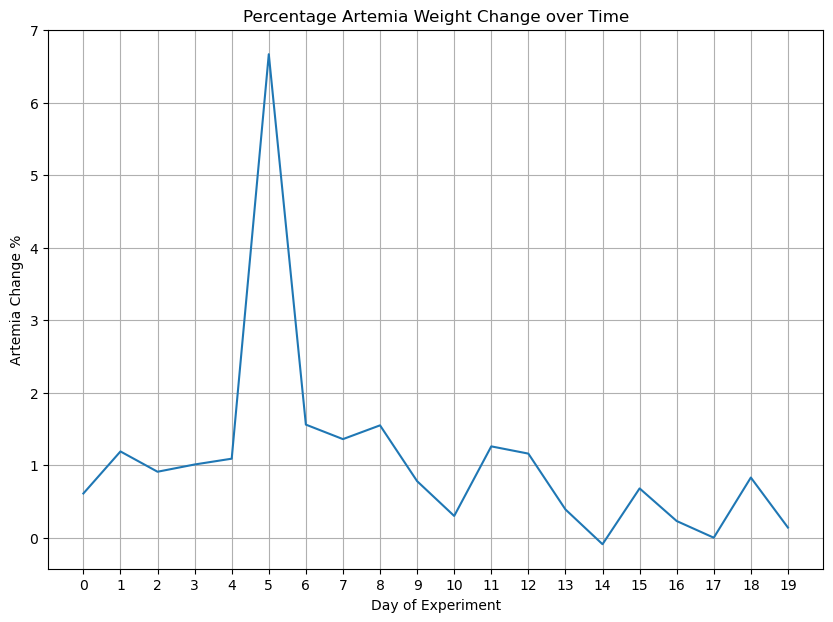

In [42]:
plt.figure(figsize=(10,7))
plt.title('Percentage Artemia Weight Change over Time')
plt.plot(vals)
plt.xlabel('Day of Experiment')
plt.ylabel('Artemia Change %')
plt.grid()
plt.xticks(range(20))
plt.savefig('weight_change_day_new.png')
plt.show()

# try with no BT

In [43]:
ind = [i for i in df.index if 'BT' not in df['Experiment name'][i]]
df_nobt = df.iloc[ind, :]

In [44]:
df_nobt

,Experiment name,Day of Experiment,Temperature [C],pH [-],Salinity [ppt],Concentration of feed solution (g/L),Volume of feed solution given (L),Feed not fed DM (g/day),Feed fed DM (g/day),Actual feed ration given (% BW),Weight wet sieve [g],Water drained [l],Measured weight S+A [g],Artemia weight [g/l],Individual weight wet [mg/animal]
0,X123a D30Fe18 SR - IBC,2,25.5,6.89,34.0,45.0,4.30,31.5,193.5,33.0,18.57,5.0,22.02,0.69,0.00
1,X123a D30Fe18 SR - IBC,3,30.1,7.43,32.0,53.0,4.35,34.1,228.4,25.0,18.57,5.0,24.02,1.09,0.00
2,X123a D30Fe18 SR - IBC,4,30.7,7.30,33.0,64.0,5.00,0.0,320.0,22.0,18.41,5.0,27.42,1.80,0.00
3,X123a D30Fe18 SR - IBC,5,29.1,7.62,31.0,72.0,4.50,36.0,324.0,16.0,20.07,5.0,32.42,2.47,0.00
4,X123a D30Fe18 SR - IBC,6,29.9,7.08,33.0,60.0,4.70,18.0,282.0,15.0,20.73,5.0,32.56,2.37,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,"X141b D30Fe1 PA, BM - XL",6,23.1,7.18,32.0,19.0,4.65,6.6,87.4,19.0,18.41,5.0,28.20,1.96,0.00
230,"X141b D30Fe1 PA, BM - XL",7,22.9,7.29,33.0,12.0,5.00,0.0,59.0,10.0,18.41,5.0,30.61,2.44,0.00
231,"X141b D30Fe1 PA, BM - XL",8,21.1,7.30,34.0,14.0,5.00,0.0,71.0,10.0,18.60,5.0,33.45,2.97,0.00
232,"X141b D30Fe1 PA, BM - XL",9,22.9,7.29,35.0,21.0,5.00,0.0,103.8,10.0,18.41,5.0,40.04,4.33,0.00


In [45]:
df_nobt['Day of Experiment'].unique()

array(['2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13',
       '14', '15', '16', '17', '18', '19', '20', '21', '1'], dtype=object)

In [46]:
filt = filtered.reset_index().drop(columns='index')
ind = [i for i in filt.index if 'BT' not in filt.experiment[i]]
ind

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 58,
 59,
 60,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 76,
 77,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 102,
 103,
 104,
 105,
 106,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 127,
 128,
 129,
 130,
 131,
 133,
 134,
 135,
 137,
 138,
 139,
 140,
 142,
 143,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 155,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 168,
 169,
 170,
 171,
 172,
 173,
 175,
 176,
 177,
 178,
 180,
 181,
 182,
 183,
 184,
 185,
 187,
 188,
 189,
 190,
 191,
 193,
 194,
 195,
 196,
 197,
 198,
 199,
 200,
 201,
 202,
 204,
 206,
 207,
 209

In [47]:
toppy = filt.iloc[ind, :]
toppy

,experiment,artemia_change
0,X123a D30Fe18 SR - IBC,7.130435
1,X015b D2F80 SR,7.102564
2,"X191a D3 to D1 Fe41 SP,BY - XL",6.850000
3,X077a D30Fe8 SR - IBC,6.824074
4,X097a D30Fe11 SR - XL2,6.800000
...,...,...
303,X017c D2F80 SR - x,0.000000
304,X023a D2Fx50 SR - XL,0.000000
305,X016C2 D2Fx75 SR,0.000000
306,X149a D30Fe1 RPA - XL,0.000000


In [48]:
top = toppy.head(20)
top

,experiment,artemia_change
0,X123a D30Fe18 SR - IBC,7.130435
1,X015b D2F80 SR,7.102564
2,"X191a D3 to D1 Fe41 SP,BY - XL",6.850000
3,X077a D30Fe8 SR - IBC,6.824074
4,X097a D30Fe11 SR - XL2,6.800000
5,X092a D1Fe10 SR - XL2,6.647059
6,X069a D3Fe1 SR - XL,6.571429
7,X088a D1Fe10 SR - XL2,6.400000
8,X086a D30Fe8 SR - IBC,6.320000
9,X114a D30Fe11 SR - XL2,6.277778


In [49]:
df_top = pd.DataFrame()
for nom in top.experiment.values:
    for key in data.keys():
        frame = data[key]
        try:
            if nom in frame['Experiment name'].values:
                to_add = frame[frame['Experiment name']==nom]
                df_top = pd.concat([df_top, to_add], ignore_index=True)
                break
        except:
            continue

In [50]:
df_top

,Experiment name,Day of Experiment,Temperature [C],pH [-],Salinity [ppt],Concentration of feed solution (g/L),Volume of feed solution given (L),Feed not fed DM (g/day),Feed fed DM (g/day),Actual feed ration given (% BW),Weight wet sieve [g],Water drained [l],Measured weight S+A [g],Artemia weight [g/l],Individual weight wet [mg/animal]
0,X123a D30Fe18 SR - IBC,2,25.5,6.89,34.0,45.0,4.30,31.5,193.5,33.0,18.570,5.0,22.020,0.69,0.00
1,X123a D30Fe18 SR - IBC,3,30.1,7.43,32.0,53.0,4.35,34.1,228.4,25.0,18.570,5.0,24.020,1.09,0.00
2,X123a D30Fe18 SR - IBC,4,30.7,7.30,33.0,64.0,5.00,0.0,320.0,22.0,18.410,5.0,27.420,1.80,0.00
3,X123a D30Fe18 SR - IBC,5,29.1,7.62,31.0,72.0,4.50,36.0,324.0,16.0,20.070,5.0,32.420,2.47,0.00
4,X123a D30Fe18 SR - IBC,6,29.9,7.08,33.0,60.0,4.70,18.0,282.0,15.0,20.730,5.0,32.560,2.37,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,X053a D1F1 SR,10,26.8,7.26,38.0,0.9,0.38,0.1,0.3,NaN,18.360,10.0,20.287,0.19,0.18
213,X053a D1F1 SR,11,24.1,7.08,34.0,0.9,0.45,0.0,0.4,NaN,18.360,10.0,20.474,0.21,0.19
214,X053a D1F1 SR,12,25.4,7.91,30.0,0.4,0.85,0.0,0.4,NaN,18.550,10.0,20.473,0.19,0.20
215,X053a D1F1 SR,13,24.9,7.88,32.0,0.5,0.90,0.0,0.4,NaN,18.475,10.0,20.603,0.21,0.24


In [51]:
df_top['Experiment name'].nunique()

20

In [52]:
df_top.to_csv('top_twenty_exps_nobt.csv', index=False)

# Looking at best experiment for each day

In [53]:
df = pd.read_csv('top_twenty_exps_nobt.csv')
df

,Experiment name,Day of Experiment,Temperature [C],pH [-],Salinity [ppt],Concentration of feed solution (g/L),Volume of feed solution given (L),Feed not fed DM (g/day),Feed fed DM (g/day),Actual feed ration given (% BW),Weight wet sieve [g],Water drained [l],Measured weight S+A [g],Artemia weight [g/l],Individual weight wet [mg/animal]
0,X123a D30Fe18 SR - IBC,2,25.5,6.89,34.0,45.0,4.30,31.5,193.5,33.0,18.570,5.0,22.020,0.69,0.00
1,X123a D30Fe18 SR - IBC,3,30.1,7.43,32.0,53.0,4.35,34.1,228.4,25.0,18.570,5.0,24.020,1.09,0.00
2,X123a D30Fe18 SR - IBC,4,30.7,7.30,33.0,64.0,5.00,0.0,320.0,22.0,18.410,5.0,27.420,1.80,0.00
3,X123a D30Fe18 SR - IBC,5,29.1,7.62,31.0,72.0,4.50,36.0,324.0,16.0,20.070,5.0,32.420,2.47,0.00
4,X123a D30Fe18 SR - IBC,6,29.9,7.08,33.0,60.0,4.70,18.0,282.0,15.0,20.730,5.0,32.560,2.37,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,X053a D1F1 SR,10,26.8,7.26,38.0,0.9,0.38,0.1,0.3,NaN,18.360,10.0,20.287,0.19,0.18
213,X053a D1F1 SR,11,24.1,7.08,34.0,0.9,0.45,0.0,0.4,NaN,18.360,10.0,20.474,0.21,0.19
214,X053a D1F1 SR,12,25.4,7.91,30.0,0.4,0.85,0.0,0.4,NaN,18.550,10.0,20.473,0.19,0.20
215,X053a D1F1 SR,13,24.9,7.88,32.0,0.5,0.90,0.0,0.4,NaN,18.475,10.0,20.603,0.21,0.24


In [54]:
df['Day of Experiment'].unique()

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21,  1], dtype=int64)

In [55]:
df_20 = df[df['Day of Experiment'].isin(df['Day of Experiment'])]
df_20

,Experiment name,Day of Experiment,Temperature [C],pH [-],Salinity [ppt],Concentration of feed solution (g/L),Volume of feed solution given (L),Feed not fed DM (g/day),Feed fed DM (g/day),Actual feed ration given (% BW),Weight wet sieve [g],Water drained [l],Measured weight S+A [g],Artemia weight [g/l],Individual weight wet [mg/animal]
0,X123a D30Fe18 SR - IBC,2,25.5,6.89,34.0,45.0,4.30,31.5,193.5,33.0,18.570,5.0,22.020,0.69,0.00
1,X123a D30Fe18 SR - IBC,3,30.1,7.43,32.0,53.0,4.35,34.1,228.4,25.0,18.570,5.0,24.020,1.09,0.00
2,X123a D30Fe18 SR - IBC,4,30.7,7.30,33.0,64.0,5.00,0.0,320.0,22.0,18.410,5.0,27.420,1.80,0.00
3,X123a D30Fe18 SR - IBC,5,29.1,7.62,31.0,72.0,4.50,36.0,324.0,16.0,20.070,5.0,32.420,2.47,0.00
4,X123a D30Fe18 SR - IBC,6,29.9,7.08,33.0,60.0,4.70,18.0,282.0,15.0,20.730,5.0,32.560,2.37,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,X053a D1F1 SR,10,26.8,7.26,38.0,0.9,0.38,0.1,0.3,NaN,18.360,10.0,20.287,0.19,0.18
213,X053a D1F1 SR,11,24.1,7.08,34.0,0.9,0.45,0.0,0.4,NaN,18.360,10.0,20.474,0.21,0.19
214,X053a D1F1 SR,12,25.4,7.91,30.0,0.4,0.85,0.0,0.4,NaN,18.550,10.0,20.473,0.19,0.20
215,X053a D1F1 SR,13,24.9,7.88,32.0,0.5,0.90,0.0,0.4,NaN,18.475,10.0,20.603,0.21,0.24


In [56]:
df_diffs = pd.DataFrame()
for nom in df_20['Experiment name'].unique():
    tmp = df_20.iloc[:, 2:].diff(periods=1)
    tmp.insert(0, df_20.columns[0], df_20.iloc[:, 0])
    tmp.insert(1, df_20.columns[1], df_20.iloc[:, 1])
    df_diffs = pd.concat([df_diffs, tmp], ignore_index=True)

In [57]:
df_diffs

,Experiment name,Day of Experiment,Temperature [C],pH [-],Salinity [ppt],Concentration of feed solution (g/L),Volume of feed solution given (L),Feed not fed DM (g/day),Feed fed DM (g/day),Actual feed ration given (% BW),Weight wet sieve [g],Water drained [l],Measured weight S+A [g],Artemia weight [g/l],Individual weight wet [mg/animal]
0,X123a D30Fe18 SR - IBC,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,X123a D30Fe18 SR - IBC,3,4.6,0.54,-2.0,8.0,0.05,2.6,34.9,-8.0,0.000,0.0,2.000,0.40,0.00
2,X123a D30Fe18 SR - IBC,4,0.6,-0.13,1.0,11.0,0.65,-34.1,91.6,-3.0,-0.160,0.0,3.400,0.71,0.00
3,X123a D30Fe18 SR - IBC,5,-1.6,0.32,-2.0,8.0,-0.50,36.0,4.0,-6.0,1.660,0.0,5.000,0.67,0.00
4,X123a D30Fe18 SR - IBC,6,0.8,-0.54,2.0,-12.0,0.20,-18.0,-42.0,-1.0,0.660,0.0,0.140,-0.10,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4335,X053a D1F1 SR,10,3.0,-0.25,3.0,0.0,-0.07,0.1,-0.1,NaN,0.000,0.0,-0.067,-0.01,-0.03
4336,X053a D1F1 SR,11,-2.7,-0.18,-4.0,0.0,0.07,-0.1,0.1,NaN,0.000,0.0,0.187,0.02,0.01
4337,X053a D1F1 SR,12,1.3,0.83,-4.0,-0.5,0.40,0.0,0.0,NaN,0.190,0.0,-0.001,-0.02,0.01
4338,X053a D1F1 SR,13,-0.5,-0.03,2.0,0.1,0.05,0.0,0.0,NaN,-0.075,0.0,0.130,0.02,0.04


In [58]:
best_days = {}
for num in df_diffs['Day of Experiment'].unique():
    tmp = df_diffs[df_diffs['Day of Experiment']==num].sort_values(by='Artemia weight [g/l]', ascending=False)
    best_days[num] = {tmp.iloc[0, 0]:tmp.iloc[0, 13]}

In [59]:
best_days

{2: {'X036a DxFx30 SR - XL': 0.8300000000000001},
 3: {'X097a D30Fe11 SR - XL2': 1.19},
 4: {'X077a D30Fe8 SR - IBC': 0.9099999999999997},
 5: {'X036a DxFx30 SR - XL': 1.0100000000000002},
 6: {'X048a D30Fx30->10 SR - XL': 1.09},
 7: {'X122d D30Fe1 SR - W1': 6.67},
 8: {'X152a D30Fe11 SR - IBC': 1.5600000000000005},
 9: {'X141b D30Fe1 PA, BM - XL': 1.3599999999999999},
 10: {'X086a D30Fe8 SR - IBC': 1.5500000000000003},
 11: {'X015b D2F80 SR': 0.78},
 12: {'X015b D2F80 SR': 0.2999999999999998},
 13: {'X114a D30Fe11 SR - XL2': 1.2600000000000007},
 14: {'X114a D30Fe11 SR - XL2': 1.1599999999999993},
 15: {'X191a D3 to D1 Fe41 SP,BY - XL': 0.3900000000000001},
 16: {'X191a D3 to D1 Fe41 SP,BY - XL': -0.0900000000000003},
 17: {'X191a D3 to D1 Fe41 SP,BY - XL': 0.6799999999999997},
 18: {'X114a D30Fe11 SR - XL2': 0.22999999999999954},
 19: {'X191a D3 to D1 Fe41 SP,BY - XL': -0.8700000000000001},
 20: {'X191a D3 to D1 Fe41 SP,BY - XL': -1.1800000000000002},
 21: {'X191a D3 to D1 Fe41 SP,BY

In [60]:
df_diffs.to_csv('diffs_with_exp_names_top_twenty_nobt.csv', index=False)
pkl.dump(best_days, open('best_days_20_nobt.pkl', 'wb'))

In [61]:
keys = np.array(list(best_days.keys())).astype(np.float32)
vals = np.array([list(k.values())[0] for k in best_days.values()]).astype(np.float32)

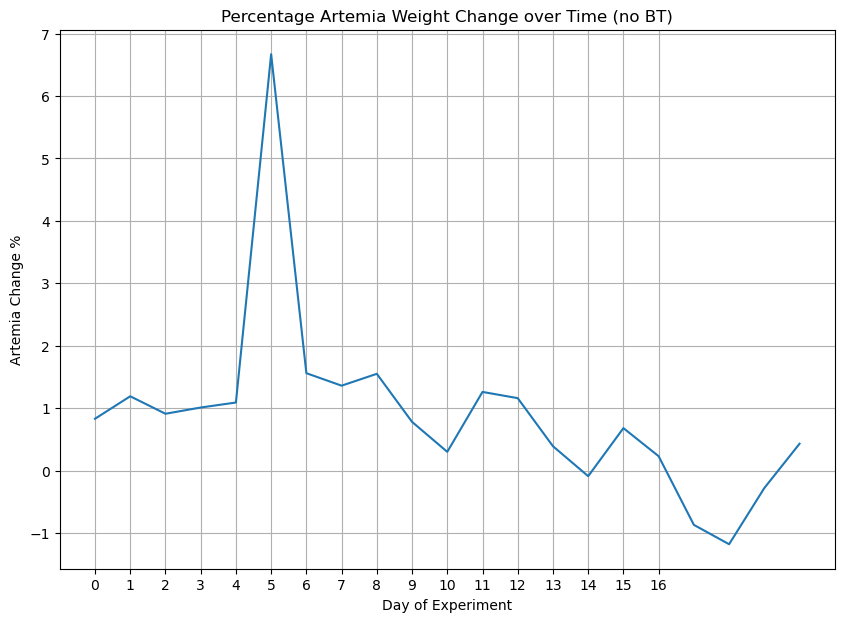

In [62]:
plt.figure(figsize=(10,7))
plt.title('Percentage Artemia Weight Change over Time (no BT)')
plt.plot(vals)
plt.xlabel('Day of Experiment')
plt.ylabel('Artemia Change %')
plt.grid()
plt.xticks(range(17))
plt.savefig('weight_change_day_nobt.png')
plt.show()

# No XL

In [63]:
ind = [i for i in df_nobt.index if 'XL' not in df_nobt['Experiment name'][i]]
df_nobtxl = df_nobt.iloc[ind, :]

IndexError: positional indexers are out-of-bounds

In [ ]:
df_nobtxl

In [64]:
df_nobtxl['Day of Experiment'].unique()

NameError: name 'df_nobtxl' is not defined

In [65]:
filt = filtered.reset_index().drop(columns='index')
ind = [i for i in filt.index if 'BT' not in filt.experiment[i]]
ind

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 58,
 59,
 60,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 76,
 77,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 102,
 103,
 104,
 105,
 106,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 127,
 128,
 129,
 130,
 131,
 133,
 134,
 135,
 137,
 138,
 139,
 140,
 142,
 143,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 155,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 168,
 169,
 170,
 171,
 172,
 173,
 175,
 176,
 177,
 178,
 180,
 181,
 182,
 183,
 184,
 185,
 187,
 188,
 189,
 190,
 191,
 193,
 194,
 195,
 196,
 197,
 198,
 199,
 200,
 201,
 202,
 204,
 206,
 207,
 209

In [66]:
toppy = filt.iloc[ind, :]
toppy

,experiment,artemia_change
0,X123a D30Fe18 SR - IBC,7.130435
1,X015b D2F80 SR,7.102564
2,"X191a D3 to D1 Fe41 SP,BY - XL",6.850000
3,X077a D30Fe8 SR - IBC,6.824074
4,X097a D30Fe11 SR - XL2,6.800000
...,...,...
303,X017c D2F80 SR - x,0.000000
304,X023a D2Fx50 SR - XL,0.000000
305,X016C2 D2Fx75 SR,0.000000
306,X149a D30Fe1 RPA - XL,0.000000


In [67]:
top = toppy.head(20)
top

,experiment,artemia_change
0,X123a D30Fe18 SR - IBC,7.130435
1,X015b D2F80 SR,7.102564
2,"X191a D3 to D1 Fe41 SP,BY - XL",6.850000
3,X077a D30Fe8 SR - IBC,6.824074
4,X097a D30Fe11 SR - XL2,6.800000
5,X092a D1Fe10 SR - XL2,6.647059
6,X069a D3Fe1 SR - XL,6.571429
7,X088a D1Fe10 SR - XL2,6.400000
8,X086a D30Fe8 SR - IBC,6.320000
9,X114a D30Fe11 SR - XL2,6.277778


In [68]:
df_top = pd.DataFrame()
for nom in top.experiment.values:
    for key in data.keys():
        frame = data[key]
        try:
            if nom in frame['Experiment name'].values:
                to_add = frame[frame['Experiment name']==nom]
                df_top = pd.concat([df_top, to_add], ignore_index=True)
                break
        except:
            continue

In [69]:
df_top

,Experiment name,Day of Experiment,Temperature [C],pH [-],Salinity [ppt],Concentration of feed solution (g/L),Volume of feed solution given (L),Feed not fed DM (g/day),Feed fed DM (g/day),Actual feed ration given (% BW),Weight wet sieve [g],Water drained [l],Measured weight S+A [g],Artemia weight [g/l],Individual weight wet [mg/animal]
0,X123a D30Fe18 SR - IBC,2,25.5,6.89,34.0,45.0,4.30,31.5,193.5,33.0,18.570,5.0,22.020,0.69,0.00
1,X123a D30Fe18 SR - IBC,3,30.1,7.43,32.0,53.0,4.35,34.1,228.4,25.0,18.570,5.0,24.020,1.09,0.00
2,X123a D30Fe18 SR - IBC,4,30.7,7.30,33.0,64.0,5.00,0.0,320.0,22.0,18.410,5.0,27.420,1.80,0.00
3,X123a D30Fe18 SR - IBC,5,29.1,7.62,31.0,72.0,4.50,36.0,324.0,16.0,20.070,5.0,32.420,2.47,0.00
4,X123a D30Fe18 SR - IBC,6,29.9,7.08,33.0,60.0,4.70,18.0,282.0,15.0,20.730,5.0,32.560,2.37,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,X053a D1F1 SR,10,26.8,7.26,38.0,0.9,0.38,0.1,0.3,NaN,18.360,10.0,20.287,0.19,0.18
213,X053a D1F1 SR,11,24.1,7.08,34.0,0.9,0.45,0.0,0.4,NaN,18.360,10.0,20.474,0.21,0.19
214,X053a D1F1 SR,12,25.4,7.91,30.0,0.4,0.85,0.0,0.4,NaN,18.550,10.0,20.473,0.19,0.20
215,X053a D1F1 SR,13,24.9,7.88,32.0,0.5,0.90,0.0,0.4,NaN,18.475,10.0,20.603,0.21,0.24


In [70]:
df_top['Experiment name'].nunique()

20

In [71]:
df_top.to_csv('top_twenty_exps_nobt.csv', index=False)

# Looking at best experiment for each day

In [72]:
df = pd.read_csv('top_twenty_exps_nobt.csv')
df

,Experiment name,Day of Experiment,Temperature [C],pH [-],Salinity [ppt],Concentration of feed solution (g/L),Volume of feed solution given (L),Feed not fed DM (g/day),Feed fed DM (g/day),Actual feed ration given (% BW),Weight wet sieve [g],Water drained [l],Measured weight S+A [g],Artemia weight [g/l],Individual weight wet [mg/animal]
0,X123a D30Fe18 SR - IBC,2,25.5,6.89,34.0,45.0,4.30,31.5,193.5,33.0,18.570,5.0,22.020,0.69,0.00
1,X123a D30Fe18 SR - IBC,3,30.1,7.43,32.0,53.0,4.35,34.1,228.4,25.0,18.570,5.0,24.020,1.09,0.00
2,X123a D30Fe18 SR - IBC,4,30.7,7.30,33.0,64.0,5.00,0.0,320.0,22.0,18.410,5.0,27.420,1.80,0.00
3,X123a D30Fe18 SR - IBC,5,29.1,7.62,31.0,72.0,4.50,36.0,324.0,16.0,20.070,5.0,32.420,2.47,0.00
4,X123a D30Fe18 SR - IBC,6,29.9,7.08,33.0,60.0,4.70,18.0,282.0,15.0,20.730,5.0,32.560,2.37,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,X053a D1F1 SR,10,26.8,7.26,38.0,0.9,0.38,0.1,0.3,NaN,18.360,10.0,20.287,0.19,0.18
213,X053a D1F1 SR,11,24.1,7.08,34.0,0.9,0.45,0.0,0.4,NaN,18.360,10.0,20.474,0.21,0.19
214,X053a D1F1 SR,12,25.4,7.91,30.0,0.4,0.85,0.0,0.4,NaN,18.550,10.0,20.473,0.19,0.20
215,X053a D1F1 SR,13,24.9,7.88,32.0,0.5,0.90,0.0,0.4,NaN,18.475,10.0,20.603,0.21,0.24


In [73]:
df['Day of Experiment'].unique()

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21,  1], dtype=int64)

In [74]:
df_20 = df[df['Day of Experiment'].isin(df['Day of Experiment'])]
df_20

,Experiment name,Day of Experiment,Temperature [C],pH [-],Salinity [ppt],Concentration of feed solution (g/L),Volume of feed solution given (L),Feed not fed DM (g/day),Feed fed DM (g/day),Actual feed ration given (% BW),Weight wet sieve [g],Water drained [l],Measured weight S+A [g],Artemia weight [g/l],Individual weight wet [mg/animal]
0,X123a D30Fe18 SR - IBC,2,25.5,6.89,34.0,45.0,4.30,31.5,193.5,33.0,18.570,5.0,22.020,0.69,0.00
1,X123a D30Fe18 SR - IBC,3,30.1,7.43,32.0,53.0,4.35,34.1,228.4,25.0,18.570,5.0,24.020,1.09,0.00
2,X123a D30Fe18 SR - IBC,4,30.7,7.30,33.0,64.0,5.00,0.0,320.0,22.0,18.410,5.0,27.420,1.80,0.00
3,X123a D30Fe18 SR - IBC,5,29.1,7.62,31.0,72.0,4.50,36.0,324.0,16.0,20.070,5.0,32.420,2.47,0.00
4,X123a D30Fe18 SR - IBC,6,29.9,7.08,33.0,60.0,4.70,18.0,282.0,15.0,20.730,5.0,32.560,2.37,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,X053a D1F1 SR,10,26.8,7.26,38.0,0.9,0.38,0.1,0.3,NaN,18.360,10.0,20.287,0.19,0.18
213,X053a D1F1 SR,11,24.1,7.08,34.0,0.9,0.45,0.0,0.4,NaN,18.360,10.0,20.474,0.21,0.19
214,X053a D1F1 SR,12,25.4,7.91,30.0,0.4,0.85,0.0,0.4,NaN,18.550,10.0,20.473,0.19,0.20
215,X053a D1F1 SR,13,24.9,7.88,32.0,0.5,0.90,0.0,0.4,NaN,18.475,10.0,20.603,0.21,0.24


In [75]:
df_diffs = pd.DataFrame()
for nom in df_20['Experiment name'].unique():
    tmp = df_20.iloc[:, 2:].diff(periods=1)
    tmp.insert(0, df_20.columns[0], df_20.iloc[:, 0])
    tmp.insert(1, df_20.columns[1], df_20.iloc[:, 1])
    df_diffs = pd.concat([df_diffs, tmp], ignore_index=True)

In [76]:
df_diffs

,Experiment name,Day of Experiment,Temperature [C],pH [-],Salinity [ppt],Concentration of feed solution (g/L),Volume of feed solution given (L),Feed not fed DM (g/day),Feed fed DM (g/day),Actual feed ration given (% BW),Weight wet sieve [g],Water drained [l],Measured weight S+A [g],Artemia weight [g/l],Individual weight wet [mg/animal]
0,X123a D30Fe18 SR - IBC,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,X123a D30Fe18 SR - IBC,3,4.6,0.54,-2.0,8.0,0.05,2.6,34.9,-8.0,0.000,0.0,2.000,0.40,0.00
2,X123a D30Fe18 SR - IBC,4,0.6,-0.13,1.0,11.0,0.65,-34.1,91.6,-3.0,-0.160,0.0,3.400,0.71,0.00
3,X123a D30Fe18 SR - IBC,5,-1.6,0.32,-2.0,8.0,-0.50,36.0,4.0,-6.0,1.660,0.0,5.000,0.67,0.00
4,X123a D30Fe18 SR - IBC,6,0.8,-0.54,2.0,-12.0,0.20,-18.0,-42.0,-1.0,0.660,0.0,0.140,-0.10,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4335,X053a D1F1 SR,10,3.0,-0.25,3.0,0.0,-0.07,0.1,-0.1,NaN,0.000,0.0,-0.067,-0.01,-0.03
4336,X053a D1F1 SR,11,-2.7,-0.18,-4.0,0.0,0.07,-0.1,0.1,NaN,0.000,0.0,0.187,0.02,0.01
4337,X053a D1F1 SR,12,1.3,0.83,-4.0,-0.5,0.40,0.0,0.0,NaN,0.190,0.0,-0.001,-0.02,0.01
4338,X053a D1F1 SR,13,-0.5,-0.03,2.0,0.1,0.05,0.0,0.0,NaN,-0.075,0.0,0.130,0.02,0.04


In [77]:
best_days = {}
for num in df_diffs['Day of Experiment'].unique():
    tmp = df_diffs[df_diffs['Day of Experiment']==num].sort_values(by='Artemia weight [g/l]', ascending=False)
    best_days[num] = {tmp.iloc[0, 0]:tmp.iloc[0, 13]}

In [78]:
best_days

{2: {'X036a DxFx30 SR - XL': 0.8300000000000001},
 3: {'X097a D30Fe11 SR - XL2': 1.19},
 4: {'X077a D30Fe8 SR - IBC': 0.9099999999999997},
 5: {'X036a DxFx30 SR - XL': 1.0100000000000002},
 6: {'X048a D30Fx30->10 SR - XL': 1.09},
 7: {'X122d D30Fe1 SR - W1': 6.67},
 8: {'X152a D30Fe11 SR - IBC': 1.5600000000000005},
 9: {'X141b D30Fe1 PA, BM - XL': 1.3599999999999999},
 10: {'X086a D30Fe8 SR - IBC': 1.5500000000000003},
 11: {'X015b D2F80 SR': 0.78},
 12: {'X015b D2F80 SR': 0.2999999999999998},
 13: {'X114a D30Fe11 SR - XL2': 1.2600000000000007},
 14: {'X114a D30Fe11 SR - XL2': 1.1599999999999993},
 15: {'X191a D3 to D1 Fe41 SP,BY - XL': 0.3900000000000001},
 16: {'X191a D3 to D1 Fe41 SP,BY - XL': -0.0900000000000003},
 17: {'X191a D3 to D1 Fe41 SP,BY - XL': 0.6799999999999997},
 18: {'X114a D30Fe11 SR - XL2': 0.22999999999999954},
 19: {'X191a D3 to D1 Fe41 SP,BY - XL': -0.8700000000000001},
 20: {'X191a D3 to D1 Fe41 SP,BY - XL': -1.1800000000000002},
 21: {'X191a D3 to D1 Fe41 SP,BY

In [79]:
df_diffs.to_csv('diffs_with_exp_names_top_twenty_nobt.csv', index=False)
pkl.dump(best_days, open('best_days_20_nobt.pkl', 'wb'))

In [80]:
keys = np.array(list(best_days.keys())).astype(np.float32)
vals = np.array([list(k.values())[0] for k in best_days.values()]).astype(np.float32)

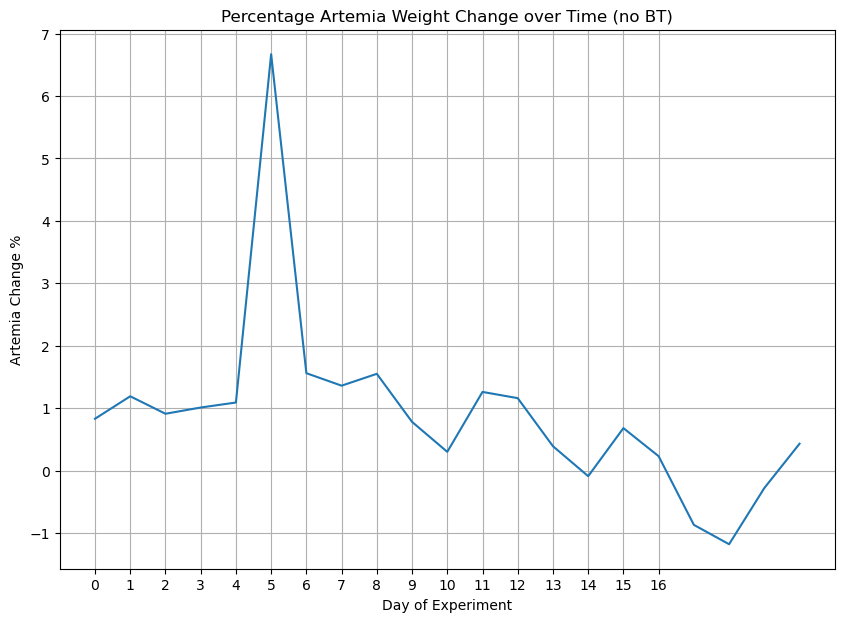

In [81]:
plt.figure(figsize=(10,7))
plt.title('Percentage Artemia Weight Change over Time (no BT)')
plt.plot(vals)
plt.xlabel('Day of Experiment')
plt.ylabel('Artemia Change %')
plt.grid()
plt.xticks(range(17))
plt.savefig('weight_change_day_nobt.png')
plt.show()